In [168]:
# Delta T results come from inverted results which is a dict of 
# 'subsets' (eg Full/Comms/Phys etc)
#   --  [
#         ('Behaviour', results),...
#       ]
import pandas as pd
import matplotlib.pyplot as plt
from aietes.Tools import *
inverted_results = uncpickle('/dev/shm/inverted_results')

In [192]:
"|{{{}}}|".format(8)

'|{8}|'

In [7]:
perfd = defaultdict()
perfd_ = defaultdict()
target = 'Alfa'
for subset_str, results in inverted_results.items():
    _rd = {k: v for k, v in results}
    try:
        _df = pd.concat([v for _, v in _rd.items()], keys=_rd.keys(), names=['bev', 'var', 'run', 'observer', 't'])
        df_mean = _df.groupby(level='bev').agg(np.nanmean)
    except ValueError:
        print("Failed on {}, continuing".format(subset_str))
        continue
    # Take the mean of mean trust values from all other nodes and subtract suspicious node
    perfd[subset_str] = df_mean.drop(target, axis=1).apply(np.nanmean, axis=1) - df_mean[target]#
    
    perfd_[subset_str] = pd.DataFrame(
    [df_mean.drop(x, axis=1).apply(np.nanmean, axis=1) - df_mean[x]
     for x in df_mean.columns
     if x != target]) \
    .mean(axis=0)
perf_df = pd.concat([v for _, v in perfd.items()], keys=perfd.keys(), names=['subset', 'bev']) \
    .unstack('bev')
perf_df_minus = pd.concat([v for _, v in perfd_.items()], keys=perfd_.keys(), names=['subset', 'bev']) \
    .unstack('bev')


In [157]:
def lower_dict_keys(d):
    return {str.lower(k):v for k,v in d.items()}
lowered_metric_rename = lower_dict_keys(metric_rename_dict)
lowered_metric_keys = map(str.lower, key_order)

def subset_renamer(index_key):
    metrics = index_key.split('_')[0:-3]
    return pd.Series([k in metrics for k in lowered_metric_keys], 
                     index=map(lowered_metric_rename.get, lowered_metric_keys))

def ticks(x):
    if isinstance(x,(bool,np.bool_)):
        return u'\u2713' if x else u''
    else:
        return x

In [79]:



#perf_df.sort('MPC', ascending=False).head().index.map(subset_renamer)
_s = perf_df['MPC']
_df=pd.DataFrame.from_records(_s.index.map(subset_renamer))
_df['$\Delta T$'] = _s.values
_df.sort(_df.columns[-1], ascending=False).head()

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,$Delay$,$P_{RX}$,$P_{TX}$,$S$,$G$,$PLR$,$INDD$,$INHD$,$Speed$,$\Delta T$
0,✓,✓,,,,✓,,,✓,0.468250
1,✓,✓,,,✓,✓,,✓,,0.621067
2,✓,,✓,✓,,,✓,,✓,0.892300
3,,✓,✓,✓,,,,✓,✓,0.890667
4,✓,,,,,✓,✓,✓,✓,0.042584
5,✓,✓,,,,,✓,,✓,0.371316
6,,,,✓,✓,✓,✓,✓,✓,0.033359
7,,✓,,,✓,,✓,✓,,0.443663
8,,✓,✓,,✓,,✓,,,0.869199
9,,✓,✓,✓,✓,,✓,,,0.875182


In [140]:
perf_df['Mean']=perf_df.mean(axis=1)
#perf_df['Var']=perf_df.var(axis=1)
bevs=['MPC', 'STS','Shadow','SlowCoach','Mean']

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


<IPython.core.display.Javascript object>


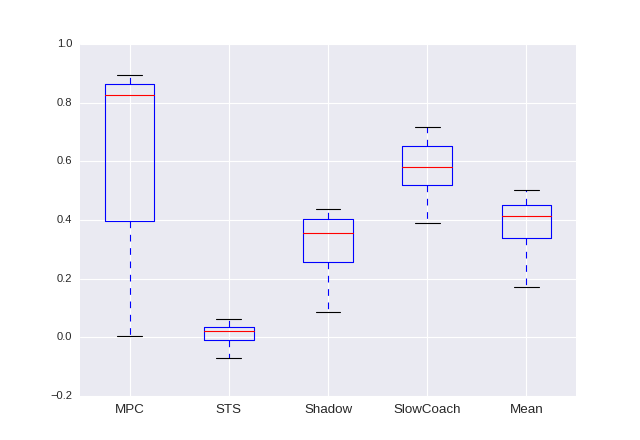

In [11]:
import seaborn as sns
%matplotlib notebook
_=perf_df.boxplot()

<IPython.core.display.Javascript object>


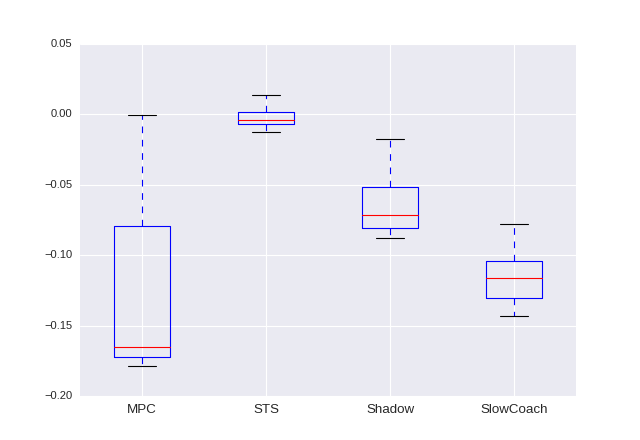

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


In [21]:
f= plt.figure()
_=perf_df_minus.boxplot()

<IPython.core.display.Javascript object>


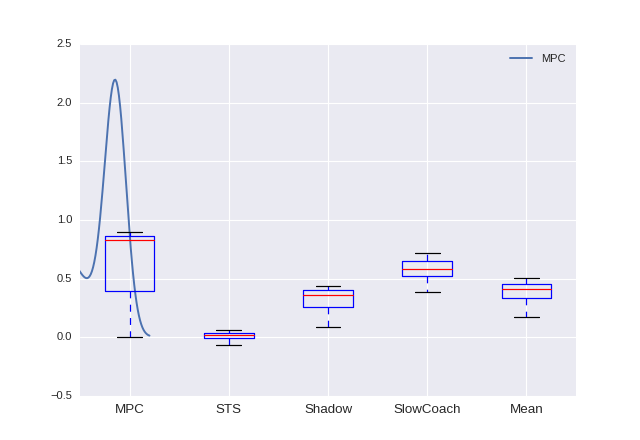

In [22]:
f= plt.figure()
sns.kdeplot(perf_df.MPC)

In [58]:
bins = np.linspace(0.0,1.0, 11)
from IPython import display

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


bev,MPC,STS,Shadow,SlowCoach,Mean
subset,,,,,
adelay_arxp_atxp_inhd_only_feats_signed,0.893569,0.012494,0.352776,0.544326,0.450791
adelay_atxp_txthroughput_inhd_speed_only_feats_signed,0.893446,-0.032194,0.174315,0.639141,0.418677
adelay_atxp_rxthroughput_inhd_only_feats_signed,0.893360,0.045381,0.124885,0.459573,0.380800
adelay_arxp_atxp_rxthroughput_inhd_only_feats_signed,0.893286,0.035404,0.347655,0.549862,0.456552
atxp_rxthroughput_indd_inhd_only_feats_signed,0.893285,-0.025161,0.266760,0.494802,0.407422


,MPC,STS,Shadow,SlowCoach,Mean
0,0.893569,0.012494,0.352776,0.544326,0.450791
1,0.893446,-0.032194,0.174315,0.639141,0.418677
2,0.893360,0.045381,0.124885,0.459573,0.380800
3,0.893286,0.035404,0.347655,0.549862,0.456552
4,0.893285,-0.025161,0.266760,0.494802,0.407422


<IPython.core.display.Javascript object>


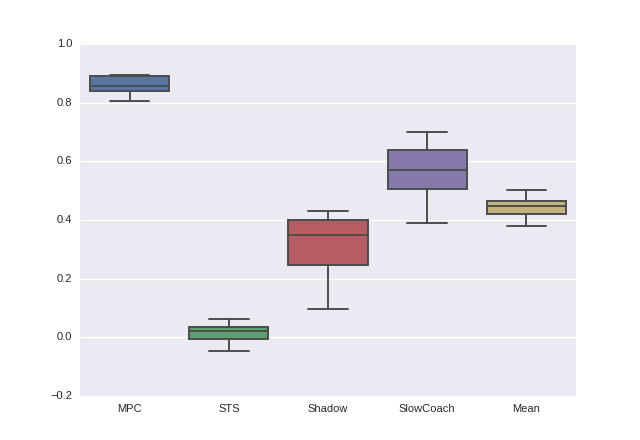

Target Behaviour                                          \
               MPC       STS    Shadow SlowCoach      Mean   
0         0.893569  0.012494  0.352776  0.544326  0.450791   
1         0.893446 -0.032194  0.174315  0.639141  0.418677   
2         0.893360  0.045381  0.124885  0.459573  0.380800   
3         0.893286  0.035404  0.347655  0.549862  0.456552   
4         0.893285 -0.025161  0.266760  0.494802  0.407422   

  Metrics in Synthetic Domain                                                \
                      $Delay$ $P_{RX}$ $P_{TX}$ $S$ $G$ $PLR$ $INDD$ $INHD$   
0                           ✓        ✓        ✓                           ✓   
1                           ✓                 ✓       ✓                   ✓   
2                           ✓                 ✓   ✓                       ✓   
3                           ✓        ✓        ✓   ✓                       ✓   
4                                             ✓   ✓                ✓      ✓   

           
  $Speed$  
0          
1       ✓  
2          
3          
4

<IPython.core.display.Latex object>

In [189]:

bev='MPC'
top_mean_df = perf_df.sort(bev, ascending=False)
display.display(top_mean_df.head())
_df = pd.DataFrame.from_records(top_mean_df.index.map(subset_renamer))  # .applymap(ticks)
for c in top_mean_df:
    _df[c] = top_mean_df[c].values
top_mean_df = _df
try:
    _df, retbins = pd.cut(top_mean_df[bev], 10, retbins=True)
except:
    print(bev)
    raise
df = top_mean_df[top_mean_df[bev] > retbins[-2]][bevs]
display.display(df.head())
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=df, ax=ax, showfliers=False, whis=1)
bev_df = top_mean_df[bevs]
m_df = top_mean_df[[metric_rename_dict[k] for k in key_order]].applymap(ticks)
top_mean_df = pd.concat((bev_df.T, m_df.T), keys=['Target Behaviour','Metrics in Synthetic Domain']).T.head()

tex=top_mean_df.head().applymap(ticks)\
            .to_latex(float_format=lambda x: "{0:1.2f}".format(x), escape=False ,
                      index=False, column_format="|l|*{4}{c}|r|") \
            .split('\n')
#tex.pop(3)  # second dimension header; overridden by the above replacement
tex = '\n'.join(tex)
display.display(top_mean_df.head().applymap(ticks))
display.Latex(tex)

Behaviour                                         Metrics                    \
        MPC       STS    Shadow SlowCoach      Mean $Delay$ $P_{RX}$ $P_{TX}$   
0  0.875203  0.025144  0.420145  0.689770  0.502565       0        1        1   
1  0.872910  0.029077  0.421169  0.683769  0.501731       1        1        1   
2  0.892857  0.040378  0.371023  0.689171  0.498357       0        1        1   
3  0.873907  0.021557  0.420161  0.669985  0.496403       1        1        1   
4  0.884120  0.037109  0.375336  0.681118  0.494421       0        1        1   

                                       
  $S$ $G$ $PLR$ $INDD$ $INHD$ $Speed$  
0   0   1     0      1      0       1  
1   0   1     0      1      0       1  
2   0   1     0      0      0       1  
3   0   0     0      1      0       1  
4   1   1     0      0      0       1

<IPython.core.display.Javascript object>

KeyError: 'Mean'

In [19]:
for bev in perf_df:
    top_mean_df = perf_df.sort(bev, ascending=False)[bev]
    _df = pd.DataFrame.from_records(top_mean_df.index.map(subset_renamer))#.applymap(ticks)
    _df[bev] = top_mean_df.values
    top_mean_df = _df


    $Delay$ $P_{RX}$ $P_{TX}$    $S$    $G$  $PLR$ $INDD$ $INHD$ $Speed$  \
0      True     True     True  False  False  False  False   True   False   
1      True    False     True  False   True  False  False   True    True   
2      True    False     True   True  False  False  False   True   False   
3      True     True     True   True  False  False  False   True   False   
4     False    False     True   True  False  False   True   True   False   
5     False    False     True   True  False  False  False   True    True   
6      True    False     True   True  False  False  False   True    True   
7     False     True     True   True  False  False  False   True   False   
8     False    False     True  False   True  False  False   True    True   
9      True    False     True   True  False  False   True  False   False   
10     True     True     True  False   True  False  False   True   False   
11    False     True     True  False   True  False  False   True    True   
12     True 

/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


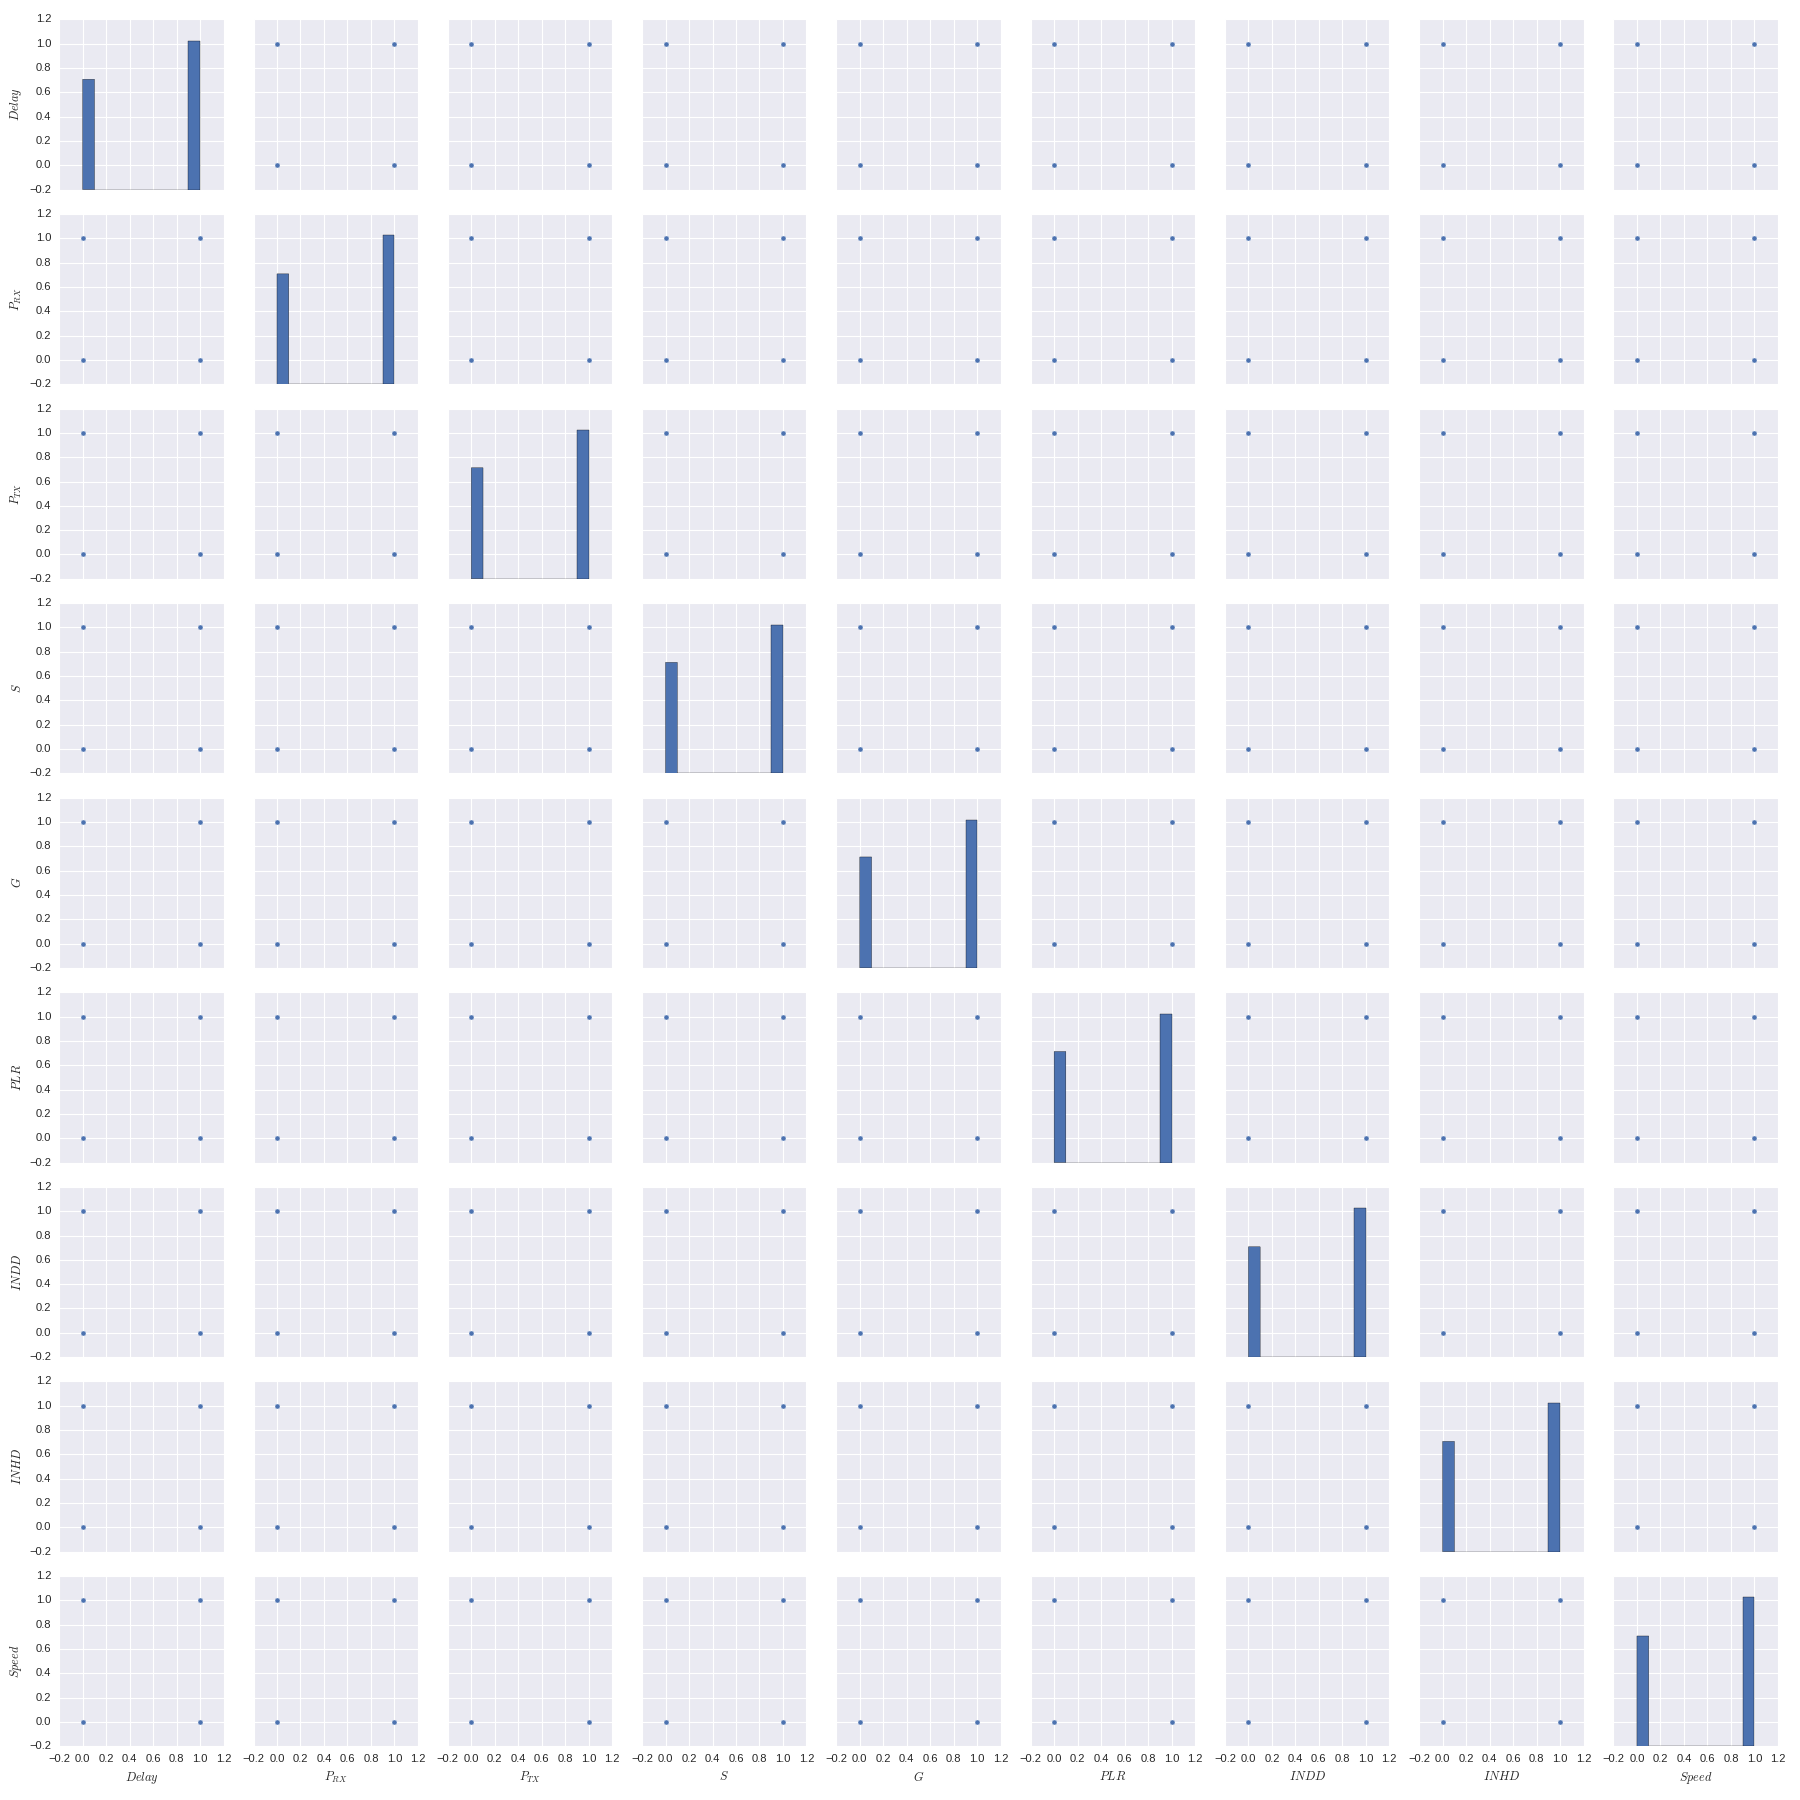

In [20]:
sns.pairplot(top_mean_df, vars=top_mean_df.columns[0:-1])

<IPython.core.display.Javascript object>


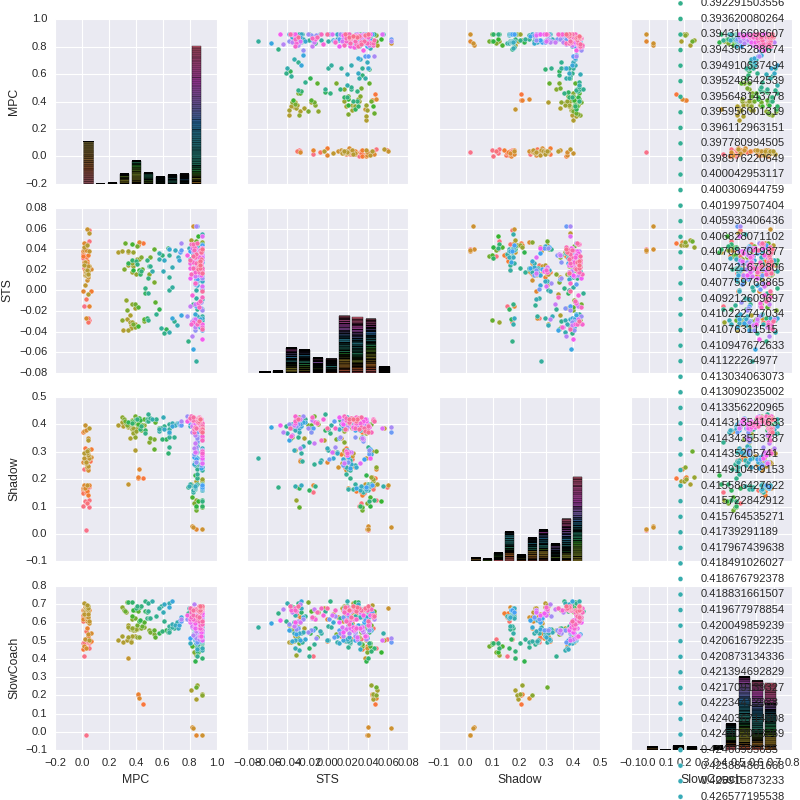

In [16]:
sns.pairplot(perf_df, vars=perf_df.columns[0:-1], hue='Mean')

In [17]:
results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53"
with pd.get_store(os.path.join(results_path, 'w_df.h5')) as s:
    w_df = s.get('weights')

In [18]:
np.array(map(len,w_df.index.get_level_values('subset').map(str.split))).shape
    

(1524,)

In [129]:
w_df.index.get_level_values('target').unique()+np.array([None])

TypeError: coercing to Unicode: need string or buffer, NoneType found